# Function to Approximate

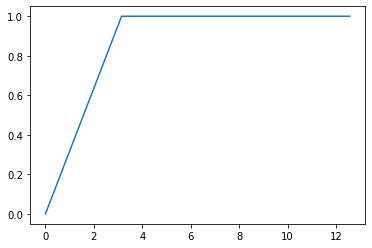

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 4*np.pi, 1000)  # plotting to 4 pi to show effect of periodic extension
f = t/np.pi
f[t > np.pi] = 1
plt.plot(t, f)

# Example with Complex Exponential Basis

imaginary part should be small
3.619361998540238e-16


Text(0, 0.5, 'power')

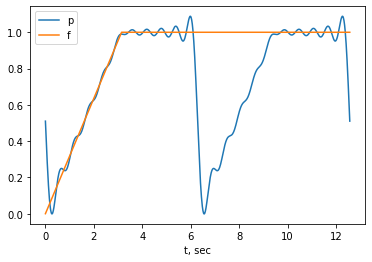

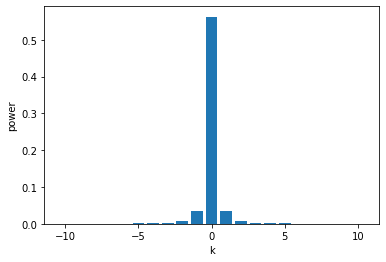

In [2]:
n = 10
k_list = np.arange(-n, n+1)
ak_list = []
p = 0
a0 = 0.75
for k in k_list:
    if k == 0:
        # print('a0', k)
        ak = a0
    elif k % 2 == 1:
        # print('odd', k)
        ak = -1/(np.pi**2*k**2) - 1j/(2*np.pi*k)
    else:
        # print('even', k)
        ak = -1j/(2*np.pi*k)
    ak_list.append(ak)
    psi_k = np.exp(-1j*k*t)
    p += ak*psi_k

ak_list = np.array(ak_list)

print('imaginary part should be small')
print(np.linalg.norm(np.imag(p)))
p = np.real(p)

plt.figure(1)
plt.plot(t, p, label='p')
plt.plot(t, f, label='f')
plt.xlabel('t, sec')
plt.legend()

plt.figure(2)
power = abs(ak_list)**2
plt.bar(k_list, power)
plt.xlabel('k')
plt.ylabel('power')

# Example with Sin/Cos Basis

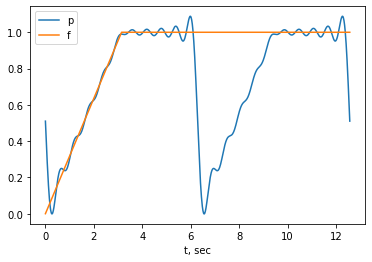

In [3]:
n = 10
k_list = np.arange(0, n+1)
ak_list = []
p = 0
for k in k_list:
    if k == 0:
        # print('a0', k)
        ak = 0.75
        psi_k = 1
        p += ak*psi_k
    elif k % 2 == 1:
        # print('odd', k)
        alpha_k = -2/(np.pi**2*k**2)
        beta_k = -1/(np.pi*k)
        p += alpha_k*np.cos(k*t) + beta_k*np.sin(k*t)
    else:
        # print('even', k)
        alpha_k = 0
        beta_k = -1/(np.pi*k)
        p += alpha_k*np.cos(k*t) + beta_k*np.sin(k*t)

    ak_list.append(ak)

ak_list = np.array(ak_list)

p = np.real(p)
plt.plot(t, p, label='p')
plt.plot(t, f, label='f')
plt.xlabel('t, sec')
plt.legend()